# Hypothesis Testing Example with a Uniform Distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

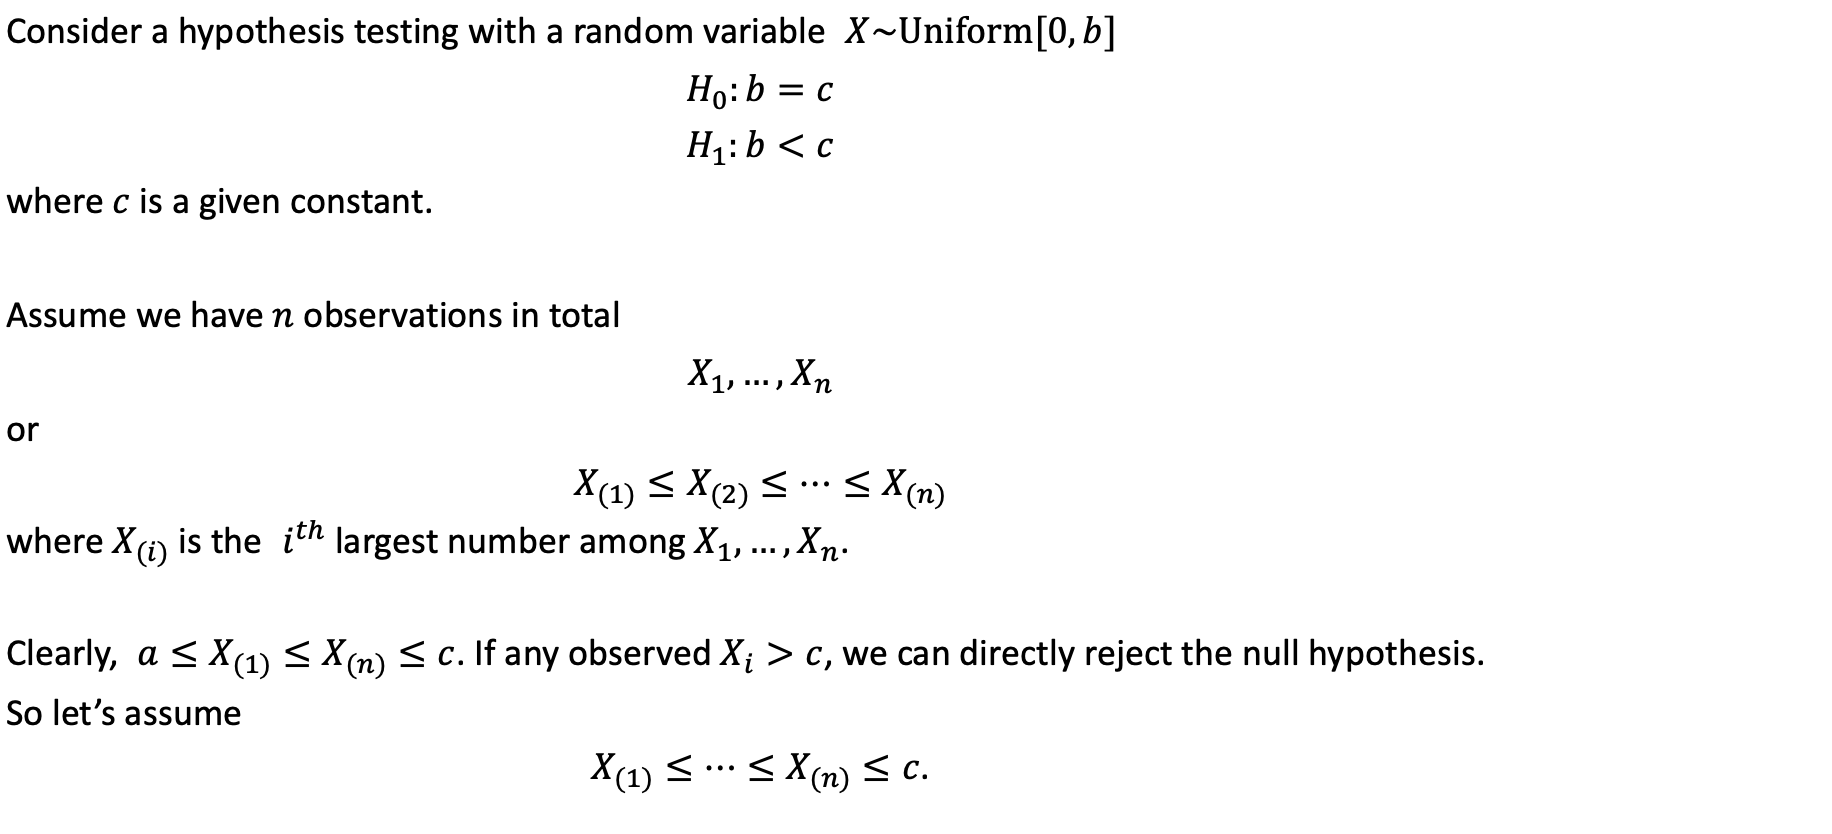

### As discussed [here](https://github.com/houzhj/Statistics/blob/main/ipynb/02_wald_lr_test.ipynb), Wald test and the Likelihood Ratio test (both are maximum-likelihood-based tests) can not be directly applied for uniform distribution. The purpose of this study is to investigate alternative testing methods.

# Contents of this note
## 1. Test Statistic
## 2. Rejection Region
## 3. Type 1 and Type 2 Error
## 4. Applications
### - Calculating the significant level of a given test
### - Finding the rejection region with a target significant level

# Part 1 - Test Statistic

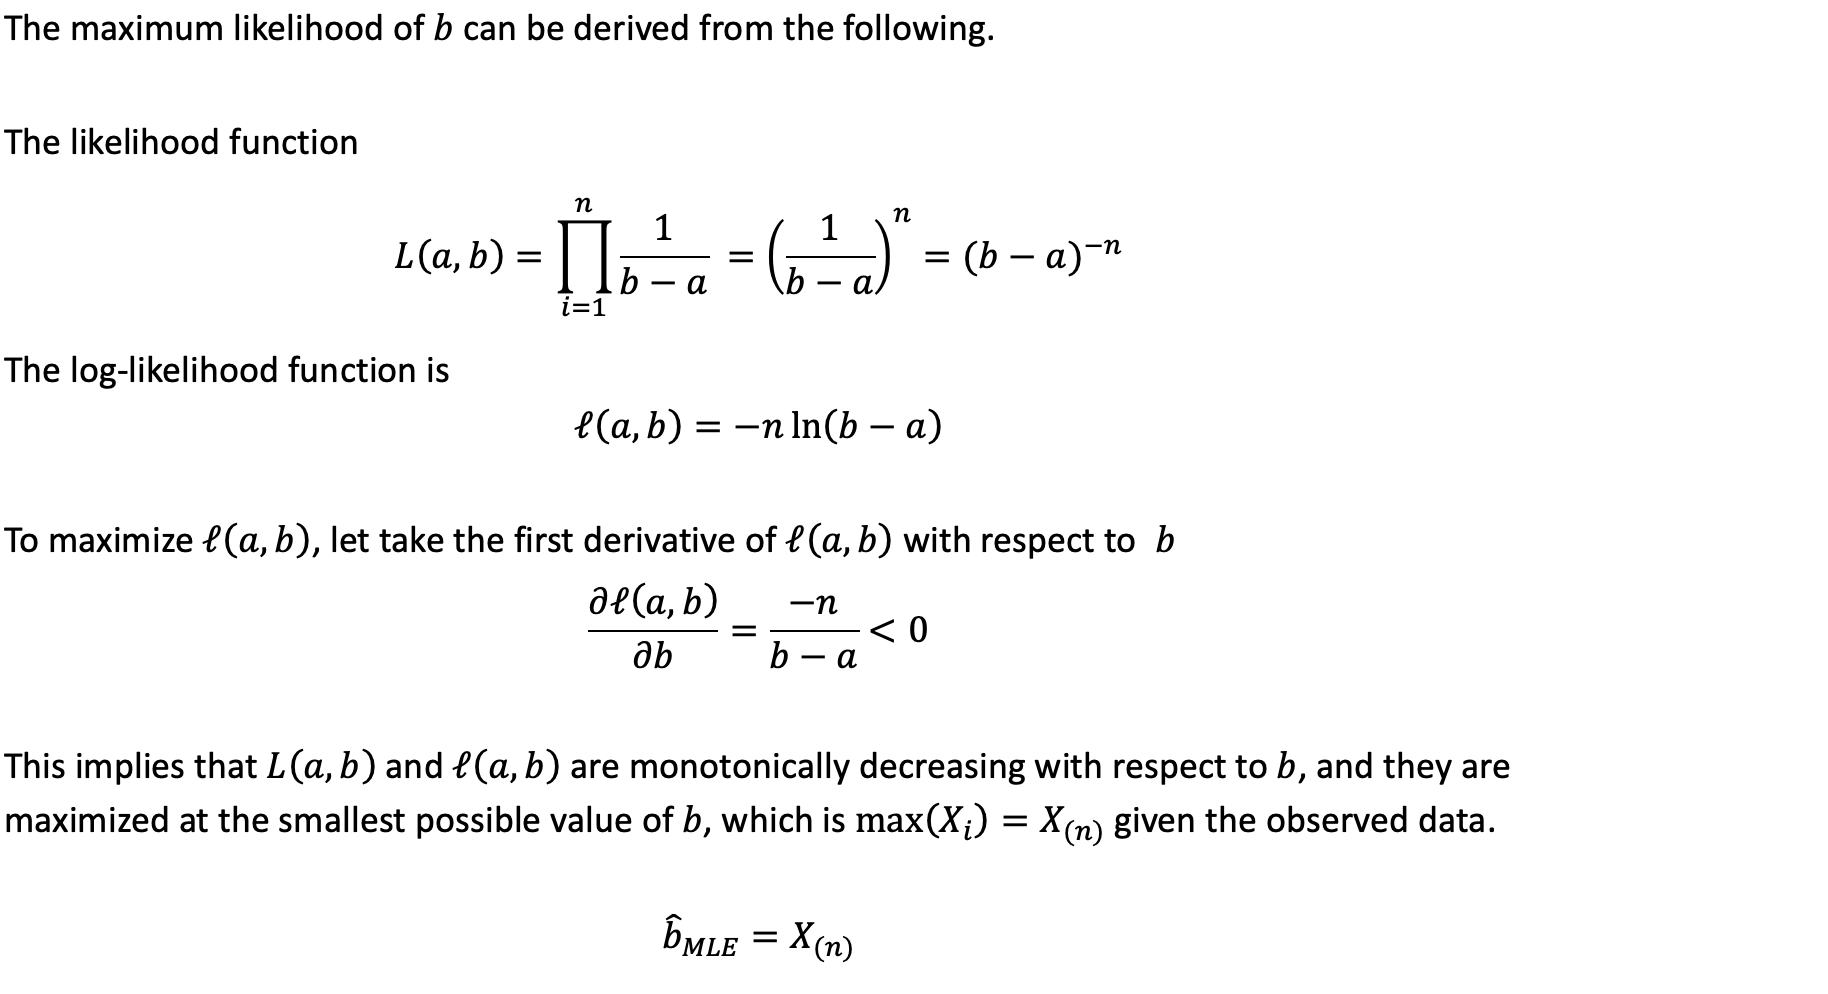

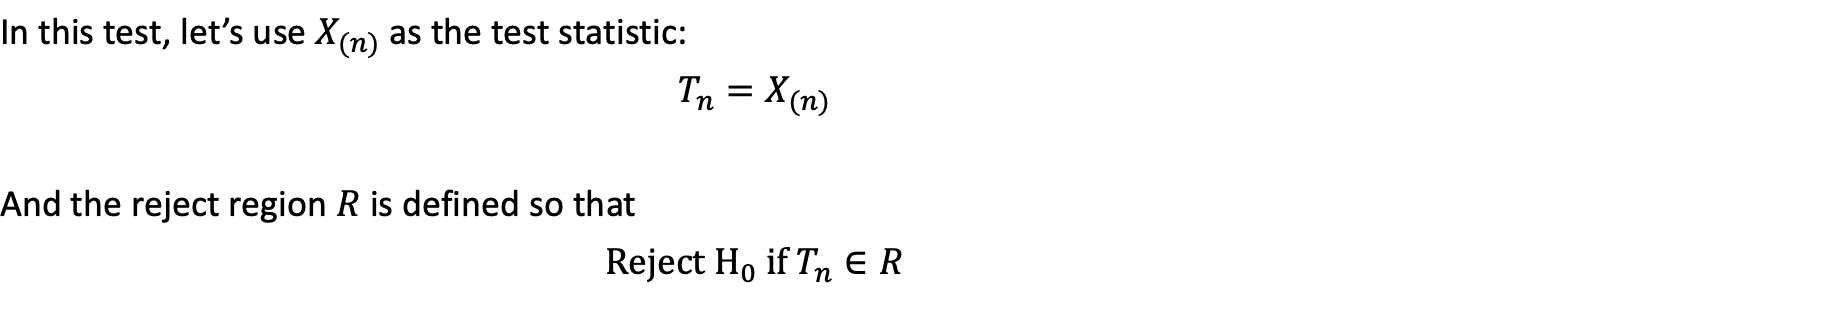

# Part 2 - Rejection Region

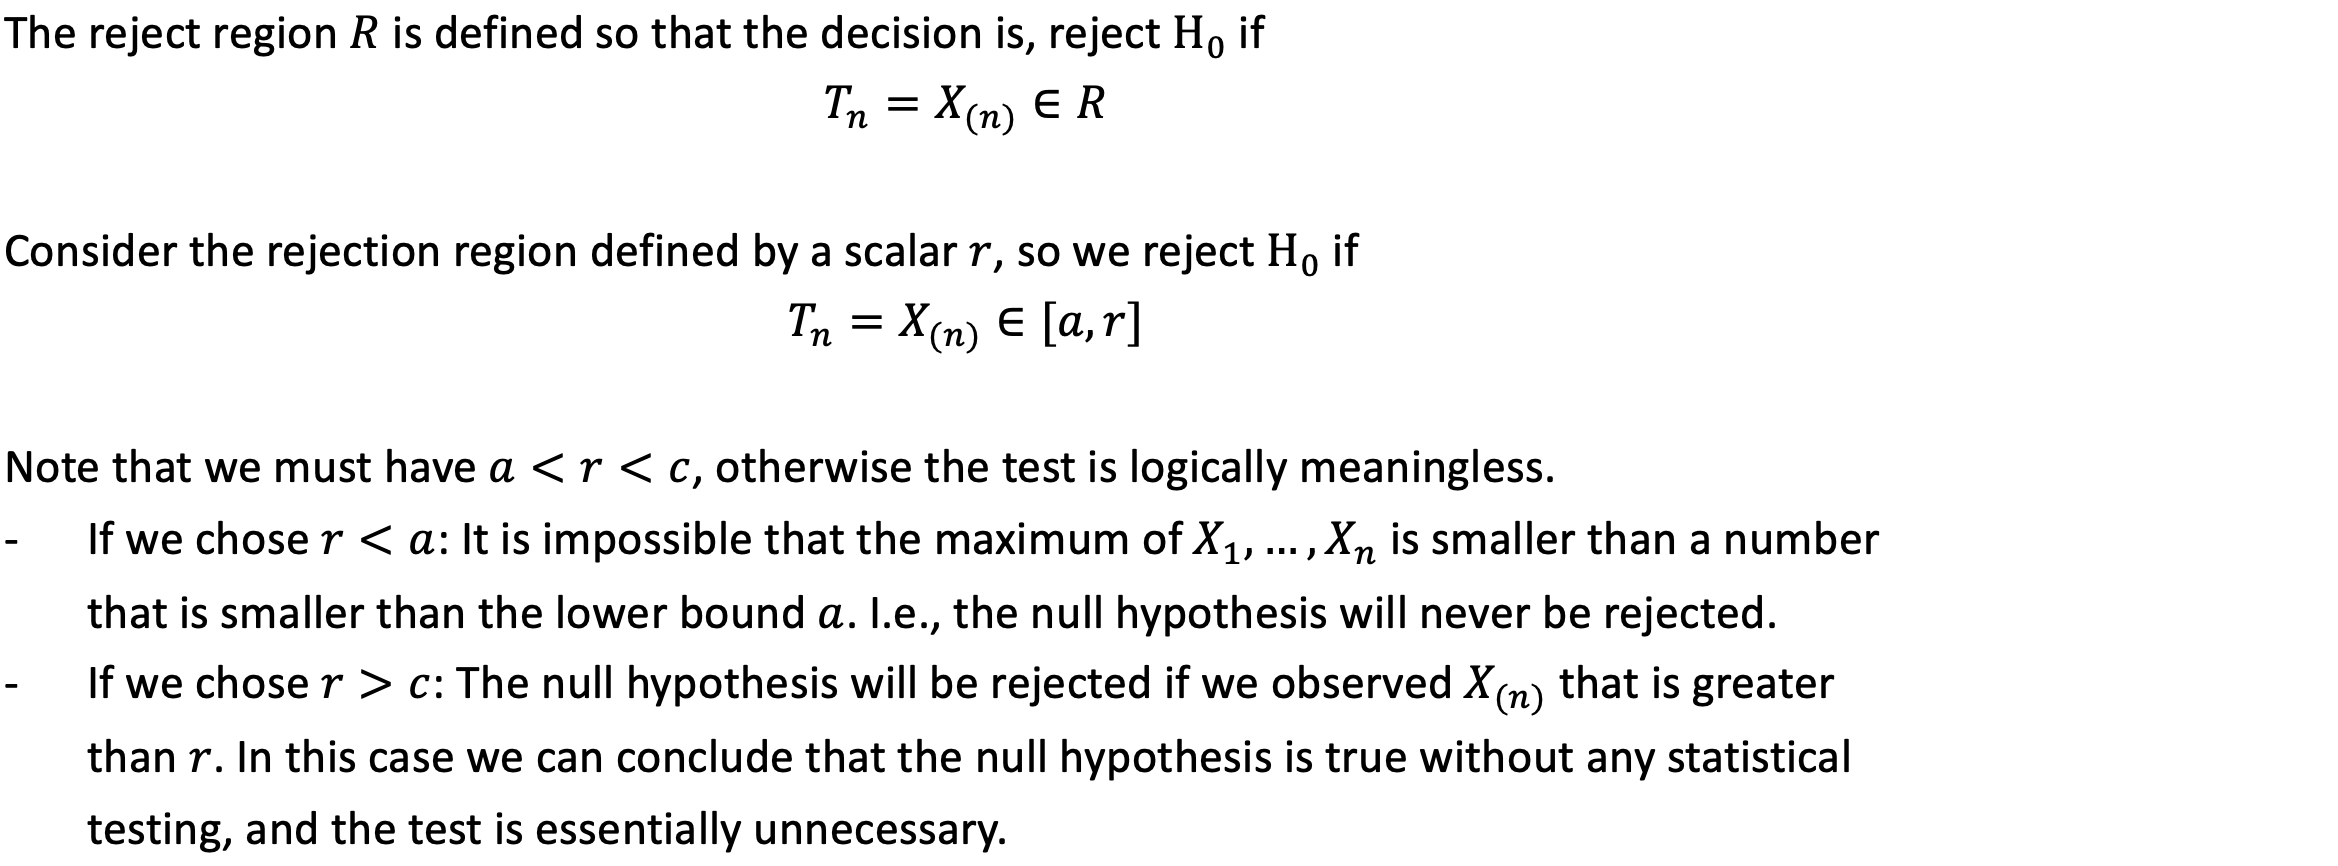

# Part 3 – Type 1 and Type 2 Error

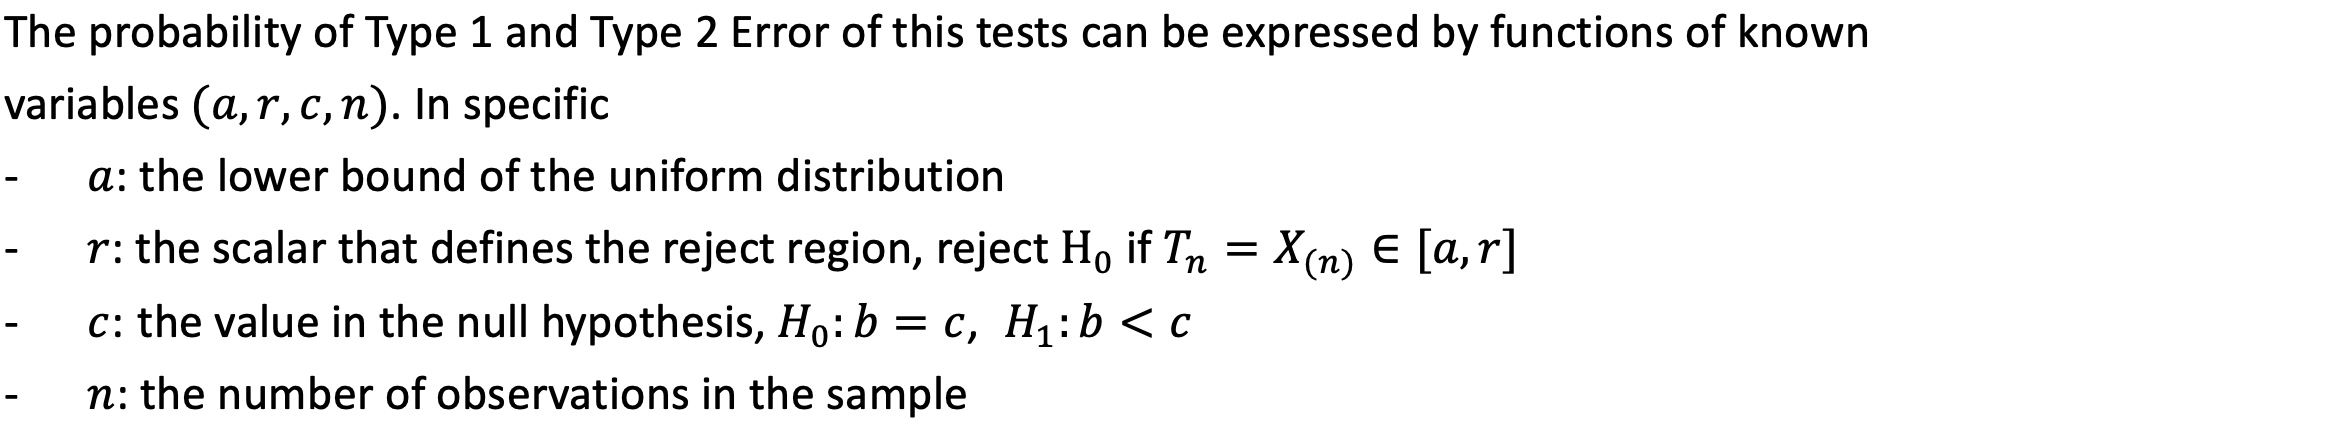

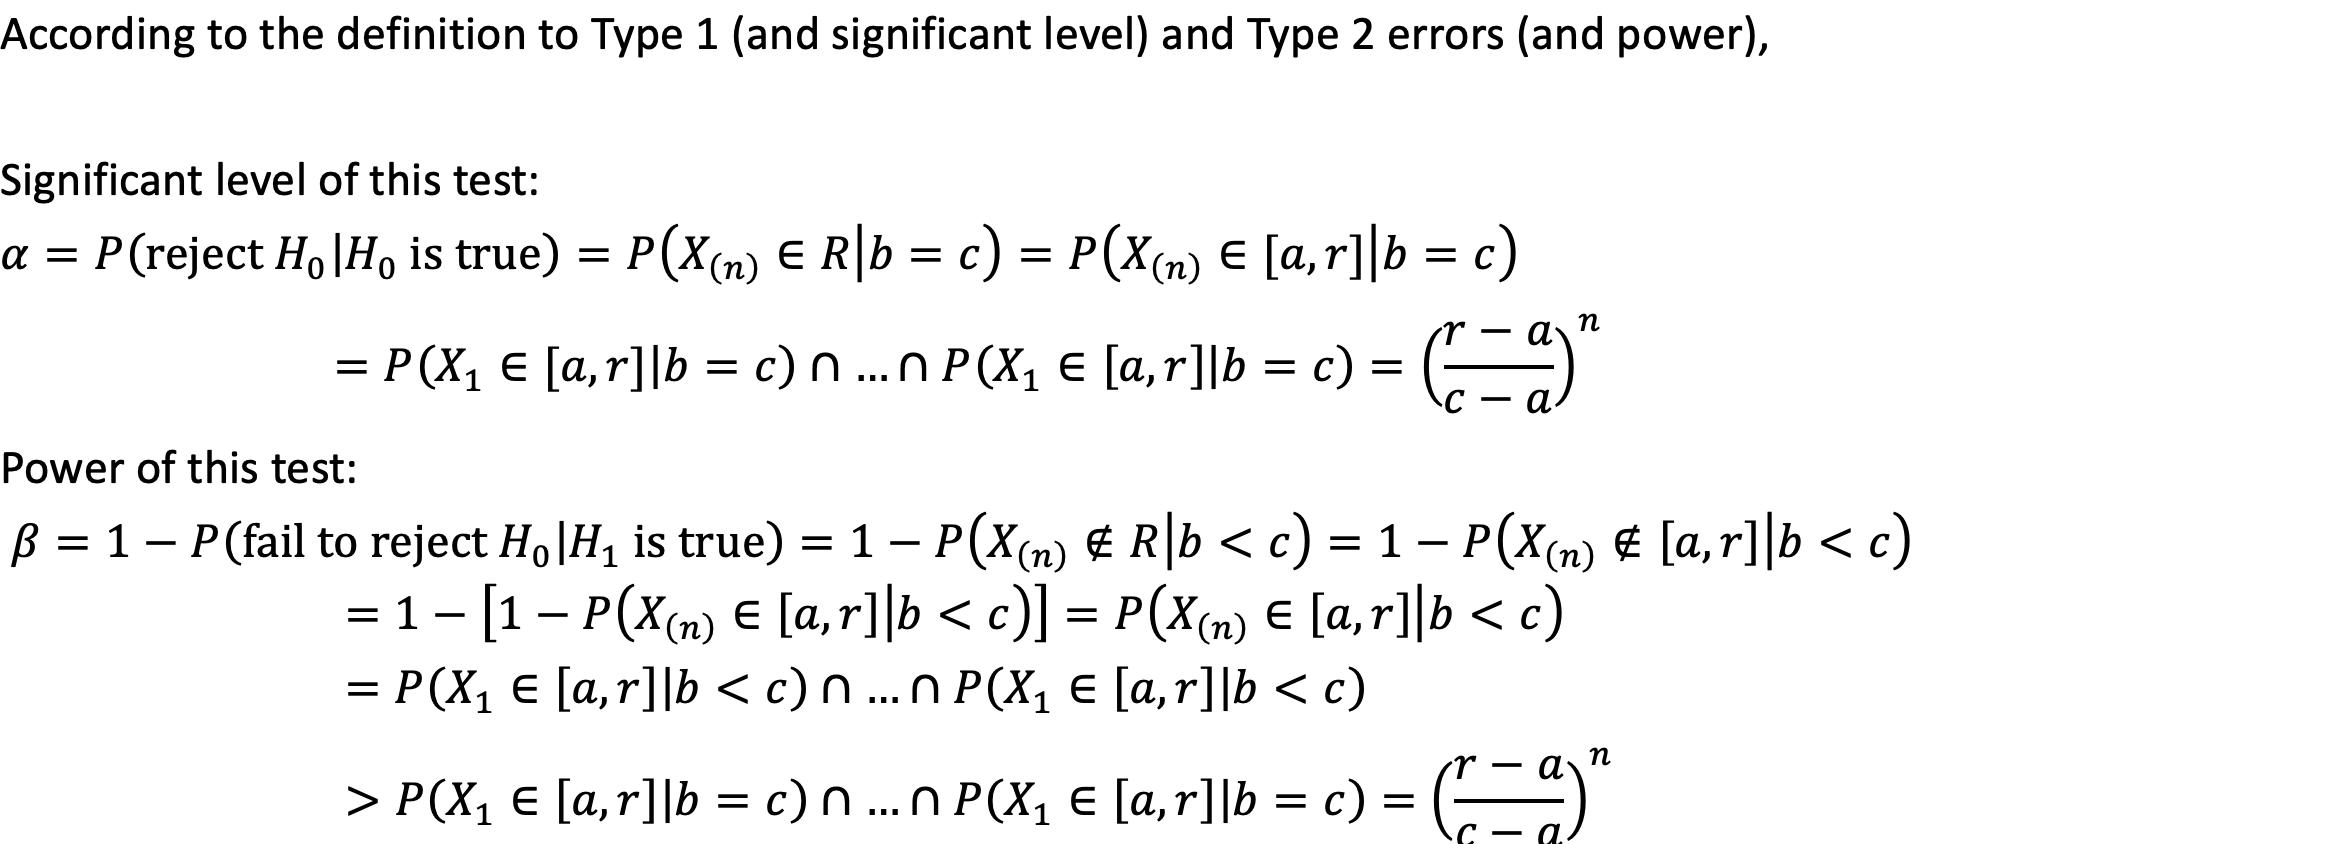

# Part 4 - Applications
### We can use these conclusions to
### 1. Calculate the significant level of a test, or
### 2. Design a test (i.e., finding the rejection region) to achieve a given significant level.

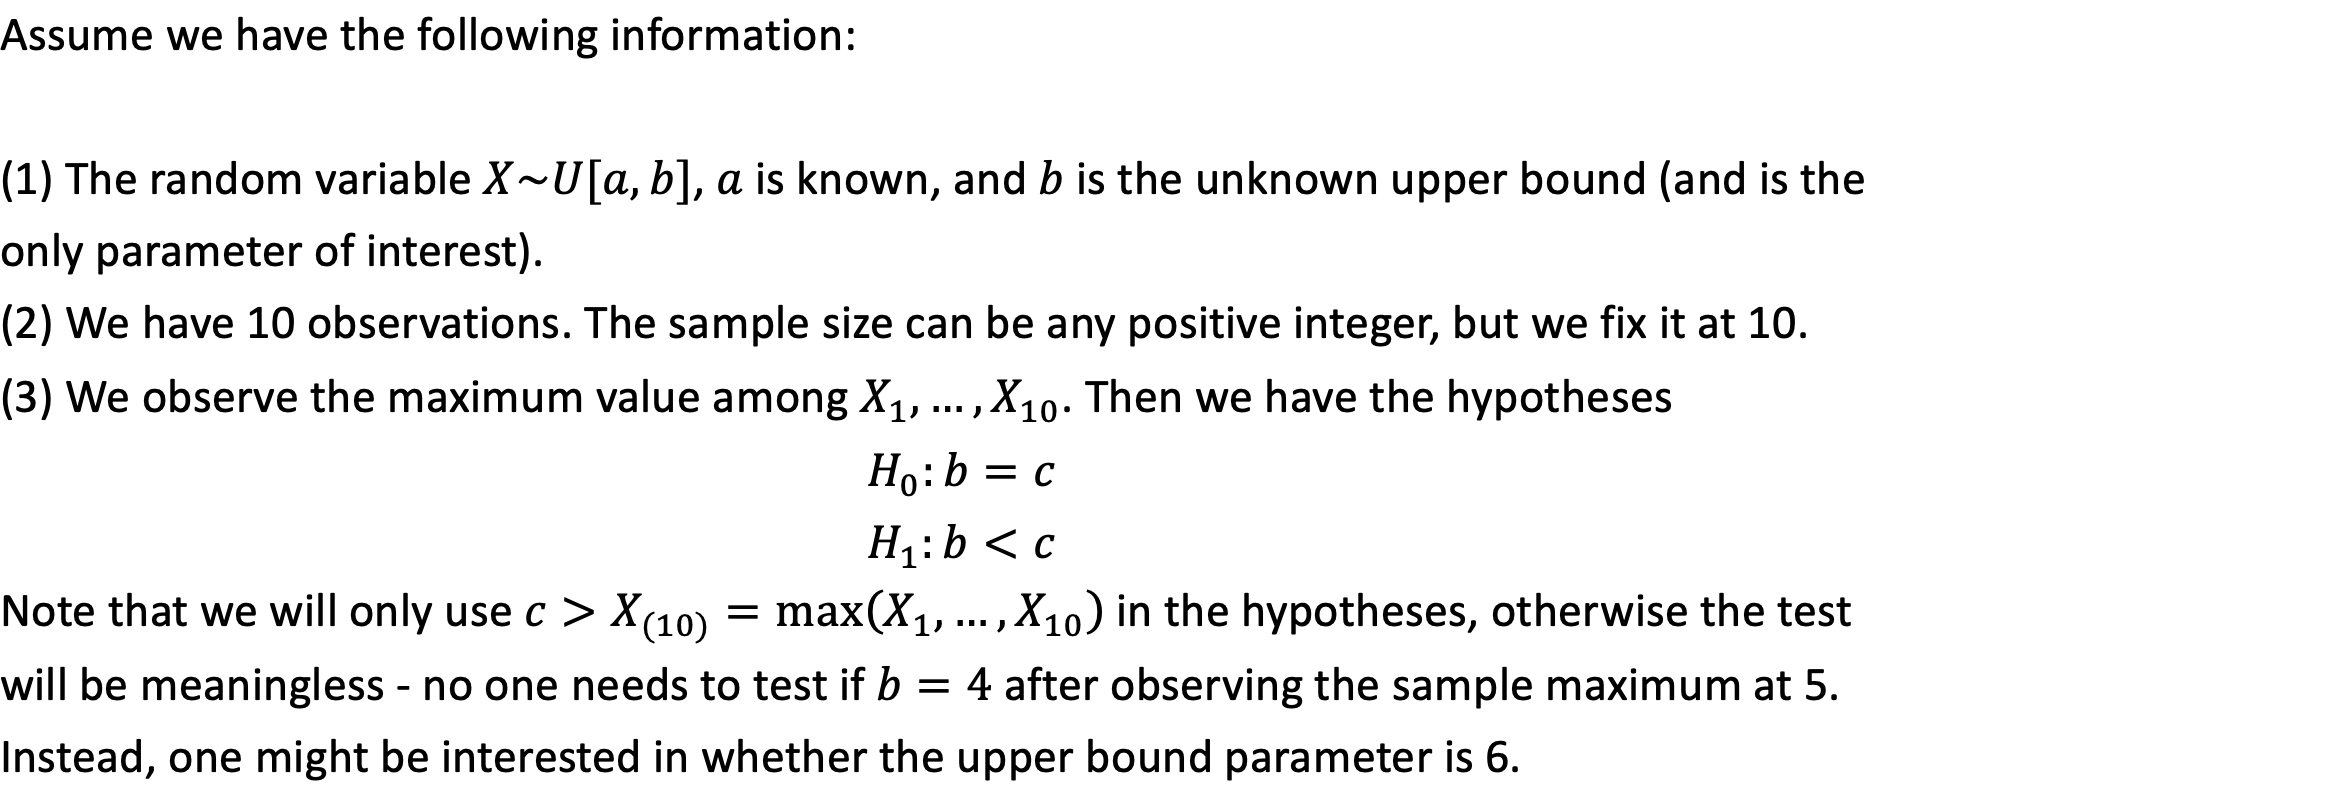

## Application 1: Calculating the significant level of a given test

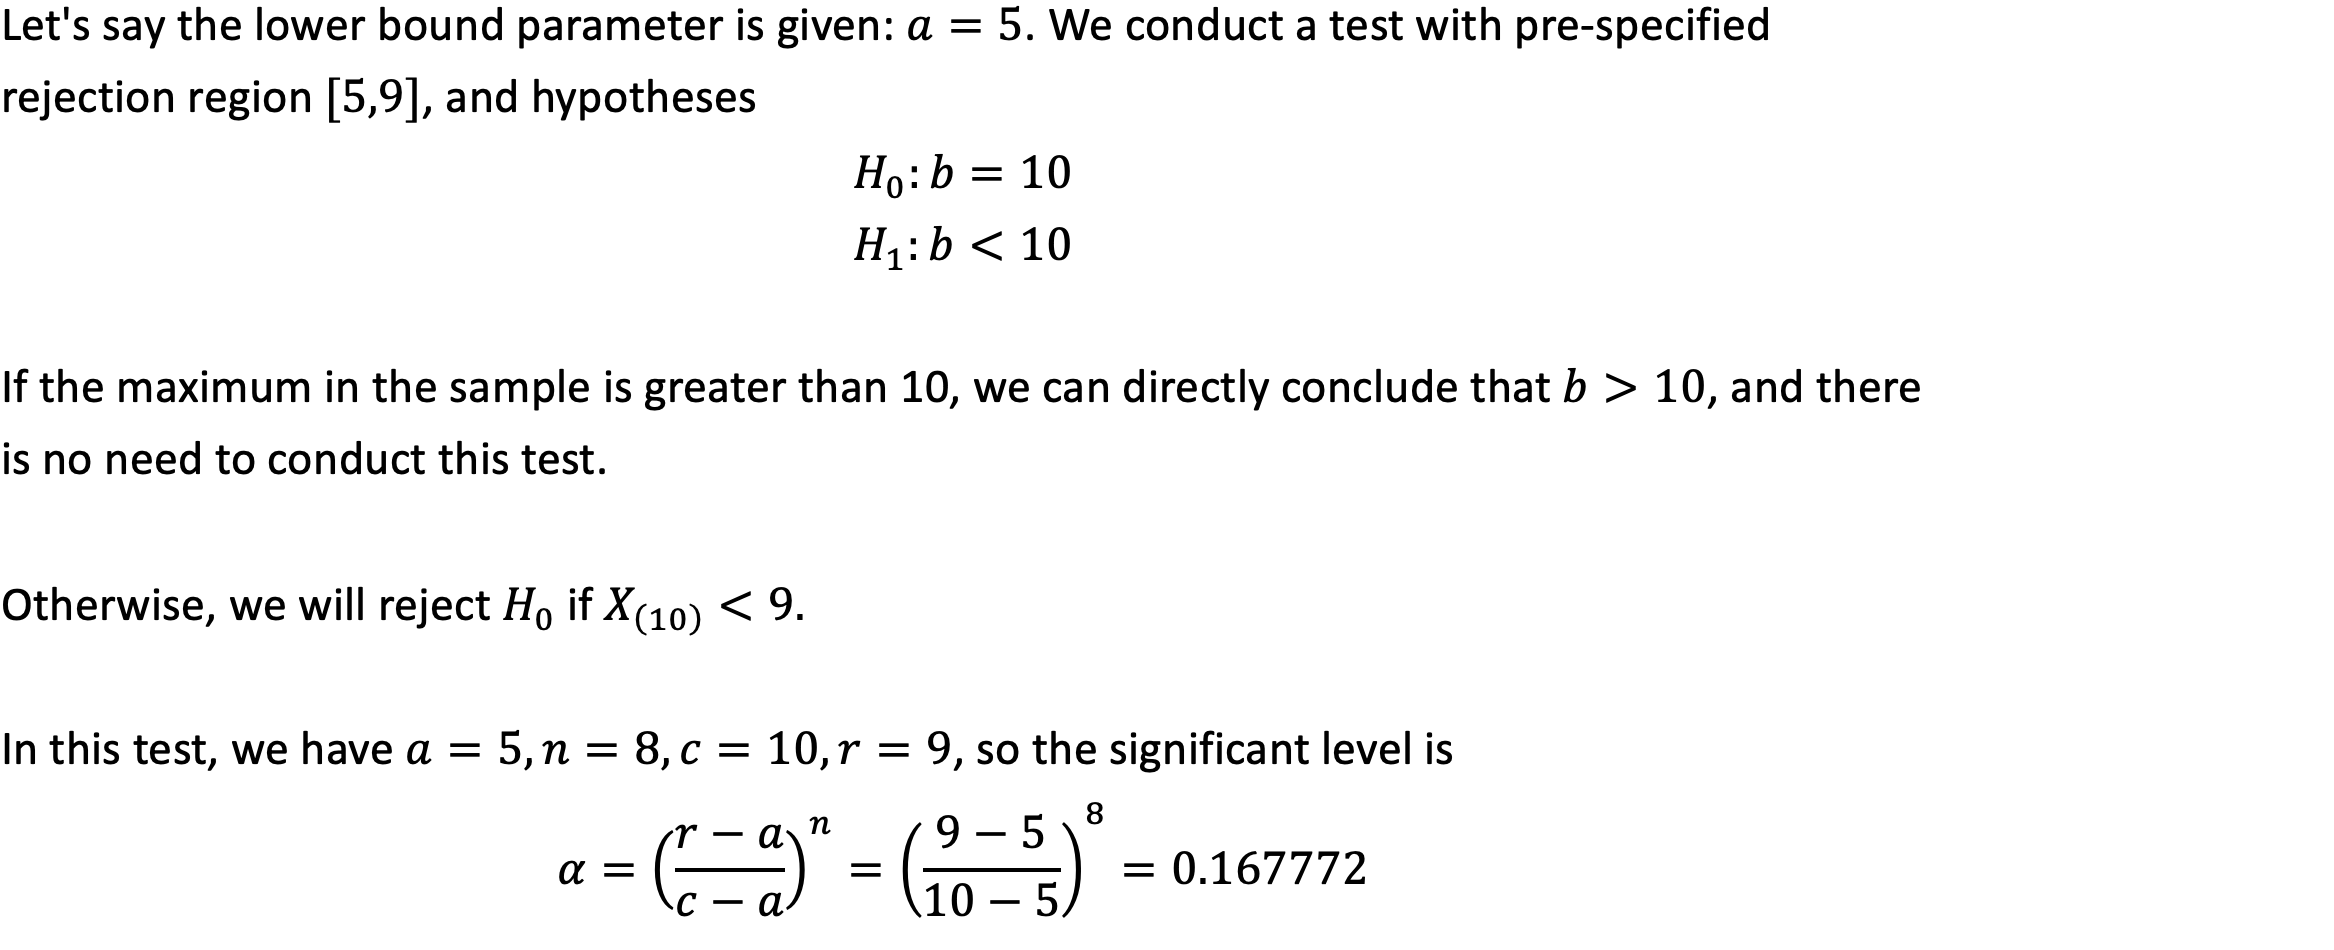

The following codes calculate the significant level with the following information

In [2]:
a      = 5

#####  10 values of r are considered: 9.0, 9.1, ..., 9.9.
r_list = [9+0.1*i for i in range(10)]

##### As the sample size increases, the maximum observable sample value tends to be larger.
sample_size_list = [10,20,50,100]
h0     = 10

##### Since this task is to calculate the type 1 error, the true b is same with the b in H0. 
true_b = 10

The following code conducted 100 experiment for all the combinations of r and n. In each combination, the rejection rate (Type 1 Error rate) is calculated. This is the **simulation-based significant level**.

In [3]:
alpha_n_r_sim = pd.DataFrame(columns = ['r values']+['n='+str(i) for i in sample_size_list])
for r in range(len(r_list)):
    alpha_n_r_sim.loc[r,'r values'] = r_list[r]
    for ss in range(len(sample_size_list)):
        n_experiment = 100
        result       = pd.DataFrame(columns=['ts','reject'])
        for e in range(n_experiment):
            sample = np.random.uniform(a,true_b,sample_size_list[ss])
            ts     = sample.max()
            result.loc[e,'ts']     = ts
            result.loc[e,'reject'] = int(ts<r_list[r])
        alpha_n_r_sim.iloc[r,ss+1] = result['reject'].mean()
alpha_n_r_sim

,r values,n=10,n=20,n=50,n=100
0,9.0,0.12,0.01,0.0,0.0
1,9.1,0.25,0.03,0.0,0.0
2,9.2,0.22,0.03,0.0,0.0
3,9.3,0.24,0.03,0.0,0.0
4,9.4,0.34,0.06,0.0,0.0
5,9.5,0.29,0.15,0.0,0.0
6,9.6,0.34,0.2,0.01,0.0
7,9.7,0.57,0.3,0.03,0.0
8,9.8,0.65,0.47,0.15,0.01
9,9.9,0.84,0.62,0.34,0.07


The code below calculate the **analytical significant level** for each combination of r and n.

In [4]:
alpha_n_r_analytical = pd.DataFrame(columns = ['r values']+['n='+str(i) for i in sample_size_list])
for r in range(len(r_list)):
    alpha_n_r_analytical.loc[r,'r values'] = r_list[r]
    for ss in range(len(sample_size_list)):
        alpha_n_r_analytical.iloc[r,ss+1] = ((r_list[r]-a)/(h0-a))**sample_size_list[ss]
alpha_n_r_analytical

,r values,n=10,n=20,n=50,n=100
0,9.0,0.107374,0.011529,0.000014,0.0
1,9.1,0.137448,0.018892,0.000049,0.0
2,9.2,0.174901,0.03059,0.000164,0.0
3,9.3,0.221302,0.048974,0.000531,0.0
4,9.4,0.278501,0.077563,0.001675,0.000003
5,9.5,0.348678,0.121577,0.005154,0.000027
6,9.6,0.434388,0.188693,0.015466,0.000239
7,9.7,0.538615,0.290106,0.045331,0.002055
8,9.8,0.664833,0.442002,0.129886,0.01687
9,9.9,0.817073,0.667608,0.36417,0.13262


The simulation-based and the analytical significant levels are compared. In general they are comparable. There are gaps between the numbers in the two tables, probably becasue the number of experiments are not large enough

## Application 2: Finding the rejection region with a target significant level

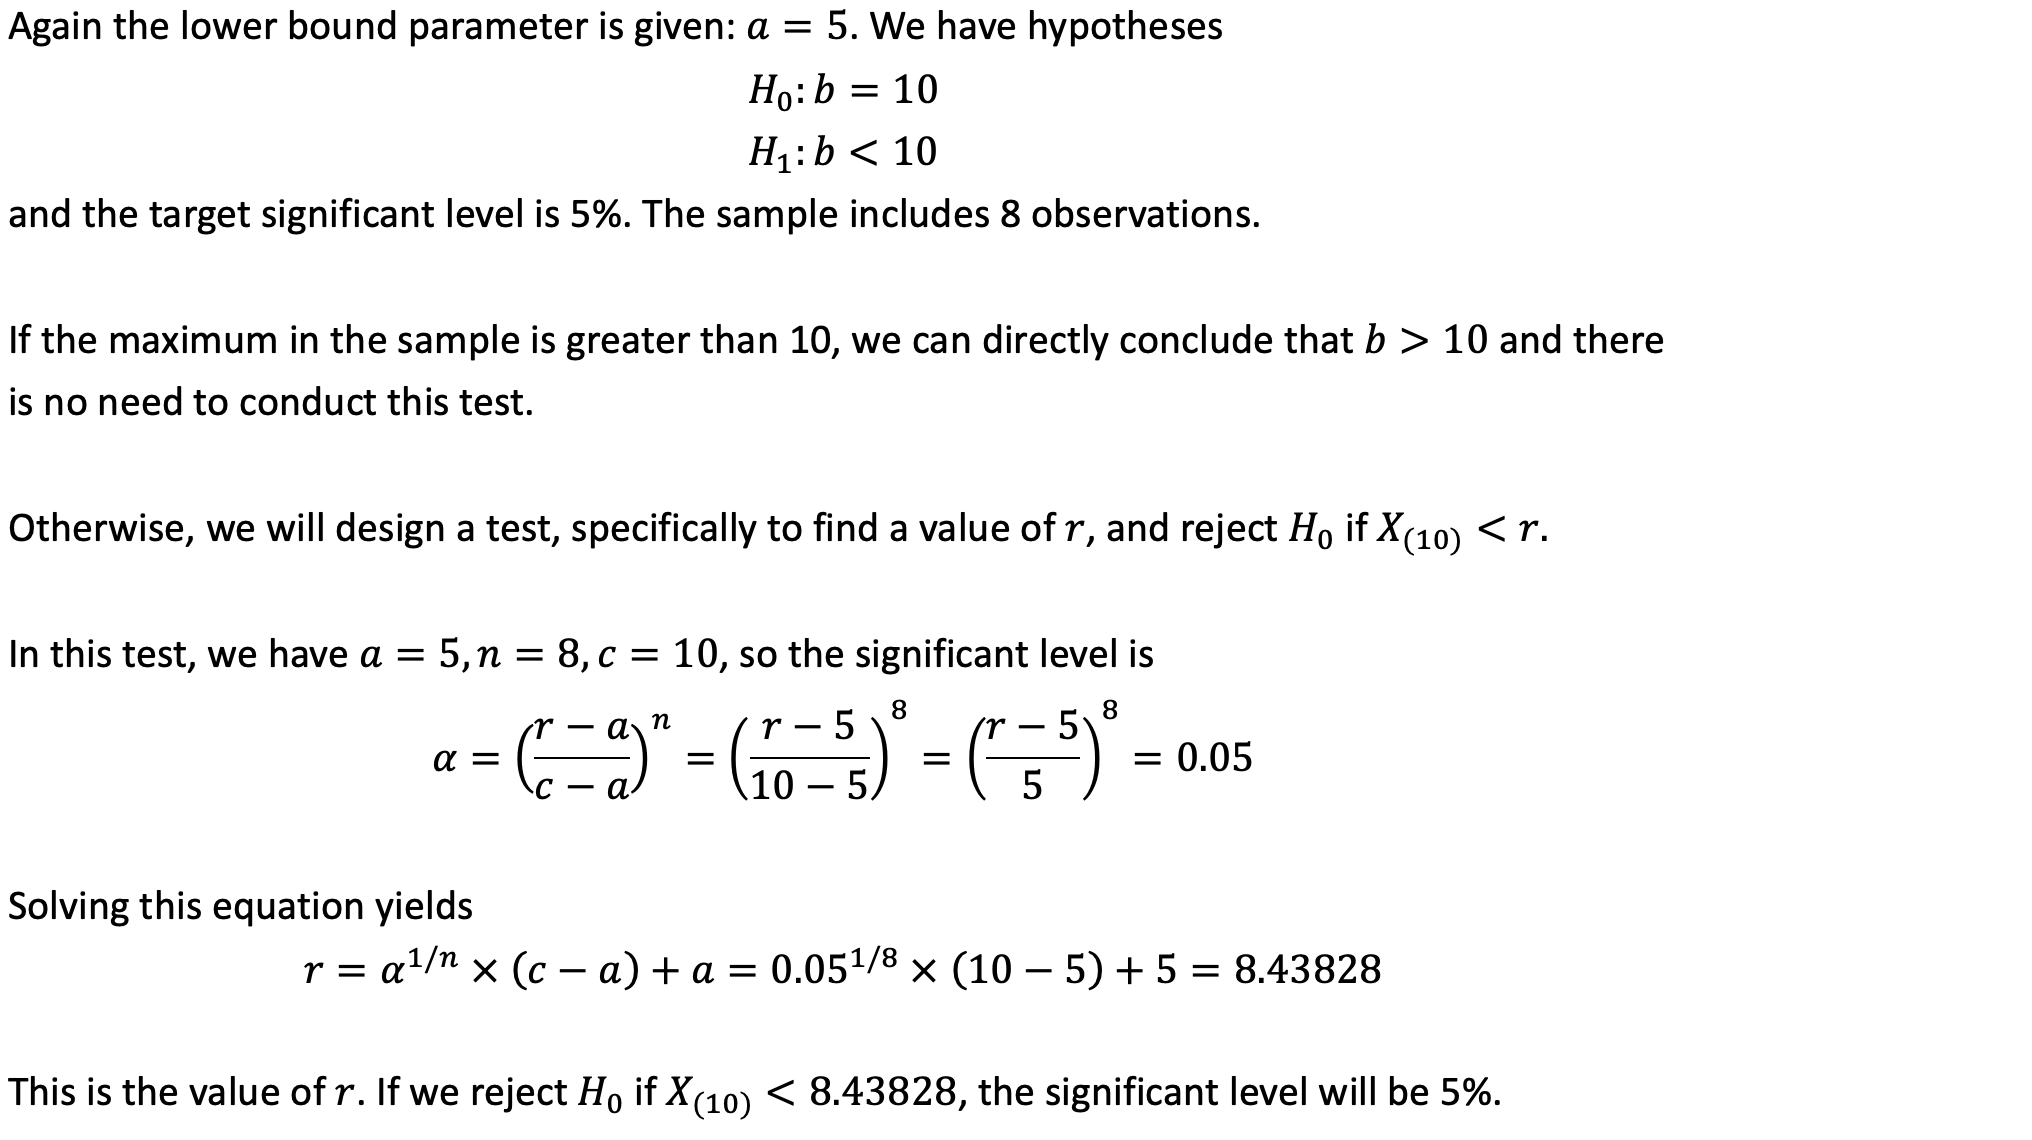

The codes below calculate the rejection region to achieve desired level, with the following options:
- Three significant levels are considered: 0.01,0.05,0.1
- Four sample sizes are considered: 8,20,50,100

In [5]:
a          = 5
alpha_list = [0.01,0.05,0.1]
sample_size_list = [8,20,50,100]
h0     = 10

In [6]:
r_n_alpha = pd.DataFrame(columns = ['alpha values']+['n='+str(i) for i in sample_size_list])
for alpha in range(len(alpha_list)):
    r_n_alpha.loc[alpha,'alpha values'] = alpha_list[alpha]
    for ss in range(len(sample_size_list)):
        r_n_alpha.iloc[alpha,ss+1] = alpha_list[alpha]**(1/sample_size_list[ss])*(h0-a)+a

In [7]:
r_n_alpha

,alpha values,n=8,n=20,n=50,n=100
0,0.01,7.811707,8.971641,9.560054,9.774963
1,0.05,8.43828,9.304458,9.709225,9.852435
2,0.1,8.749471,9.456255,9.774963,9.886186


#### checking: n=20, r=9.456255, expected alpha=0.1 

In [8]:
n_experiment = 1000
n_now = 20
r_now = 9.456255

alpha_check = [np.nan]*10

for i in range(10):
    result       = pd.DataFrame(columns=['ts','reject'])
    for e in range(n_experiment):
        sample = np.random.uniform(a,true_b,n_now)
        ts     = sample.max()
        result.loc[e,'ts']     = ts
        result.loc[e,'reject'] = int(ts<r_now)
    alpha_check[i]=result['reject'].mean()
alpha_check

[0.107, 0.096, 0.095, 0.108, 0.102, 0.104, 0.12, 0.098, 0.118, 0.096]

#### checking: n=50, r=9.560054, expected alpha=0.01

In [9]:
n_experiment = 1000
n_now = 50
r_now = 9.560054

alpha_check = [np.nan]*10

for i in range(10):
    result       = pd.DataFrame(columns=['ts','reject'])
    for e in range(n_experiment):
        sample = np.random.uniform(a,true_b,n_now)
        ts     = sample.max()
        result.loc[e,'ts']     = ts
        result.loc[e,'reject'] = int(ts<r_now)
    alpha_check[i]=result['reject'].mean()
alpha_check

[0.009, 0.013, 0.01, 0.004, 0.01, 0.006, 0.01, 0.015, 0.01, 0.007]